<center>
    
# Integrales Numéricas en Datos Experimentales

### Juan Sebastian Sierra Jaraba - jsierraj@unal.edu.co 
### Departamento de Física, Facultad de Ciencias, Sede Bogotá
### Universidad Nacional de Colombia
    
</center>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

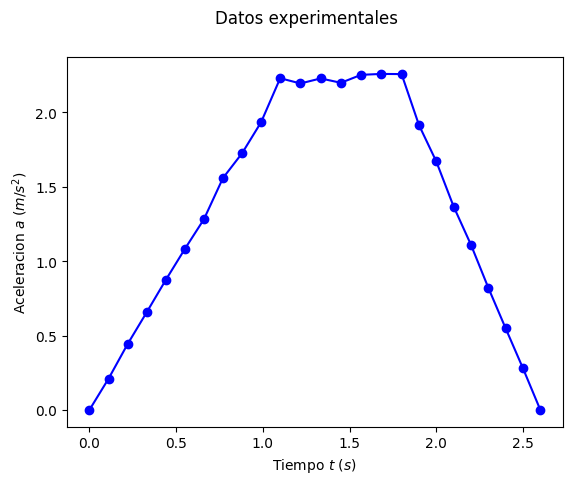

In [2]:
#Datos Experimentales
dataSet = np.genfromtxt("accel.txt", delimiter=' ', skip_header=0,skip_footer=0,missing_values=np.nan)
time = dataSet[:,0]
acce = dataSet[:,1]

fig, ax = plt.subplots()
fig.suptitle("Datos experimentales")
ax.plot(time, acce, "b-o")
ax.set_xlabel(r"Tiempo $t$ $(s)$")
ax.set_ylabel(r"Aceleracion $a$ $(m/s^2)$")

plt.savefig("datos_experimentales.png")

In [3]:
#Integrar para encontrar velocidad y posicion
def trapecio(x, y, b):
    integ = 0
    yield integ
    size = np.size(x)
    for ii in range(1, size):
        integ += ((y[ii]+y[ii-1])*(x[ii]-x[ii-1]))/2
        yield integ
        if x[ii] > b: break

        
velo = np.array(list(trapecio(time, acce, time[-1])))
posx = np.array(list(trapecio(time, velo, time[-1])))

In [32]:
#Encontrar la region en la que es constante la aceleracion

size = time.size

for ii in range(1, size-1):
    if abs(acce[ii+1] - acce[ii]) < abs(acce[ii] - acce[ii-1])/5: init = ii; break

for ii in range(1, size-1):
    if abs(acce[ii] - acce[ii-1]) < abs(acce[ii+1] - acce[ii])/5: end = ii; break

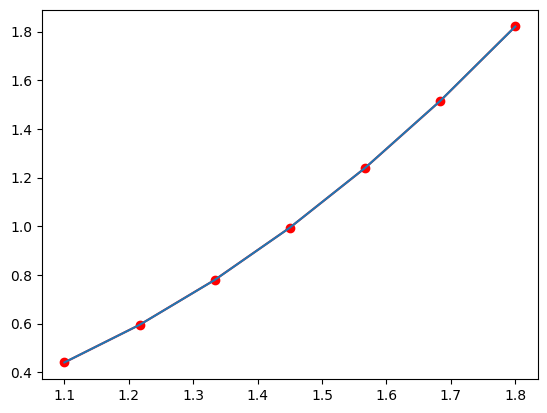

In [24]:
#Ajuste no lineal de la posición

# Definir la función de ajuste
def lineal(t, v0, a):
    return v0 + a*t

def cuadratic(t, x0, v0, a):
    return x0 + v0*t + 0.5*a*t**2

# Realizar el ajuste de curva
popt, pcov = curve_fit(cuadratic, time[init:end+1], posx[init:end+1])

# Obtener los valores ajustados y los errores
x0, v0, a = popt
eps_x, eps_v, eps_a = 3*np.sqrt(np.diag(pcov))

plt.plot(time[init:end+1], posx[init:end+1], "r-o", time[init:end+1], cuadratic(time[init:end+1], x0, v0, a))

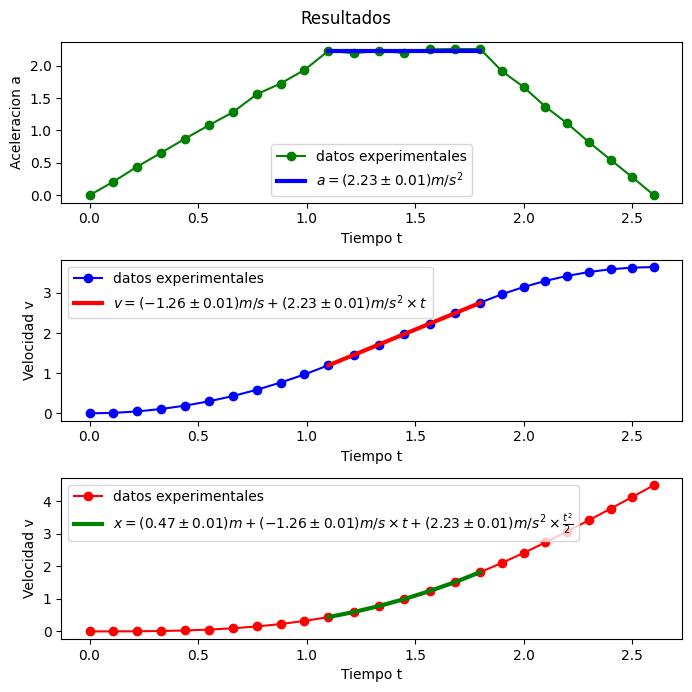

In [51]:
#Ploting

fig = plt.figure(figsize=(7, 7))
fig.suptitle("Resultados")

ax1 = fig.add_subplot(3,1,1)
ax1.plot(time, acce, "g-o", label='datos experimentales') 
ax1.plot(time[init:end+1], a+np.zeros(end+1-init), "b-", linewidth=3, label=r'$a = (%.2f \pm %.2f)m/s^2$'%(a, eps_a))

ax1.legend()
ax1.set_xlabel("Tiempo t")
ax1.set_ylabel("Aceleracion a")

ax1 = fig.add_subplot(3,1,2)
ax1.plot(time, velo, "b-o", label='datos experimentales')
ax1.plot(time[init:end+1], lineal(time[init:end+1], v0, a), "r-", linewidth=3, label=r'$v =(%.2f \pm %.2f)m/s + (%.2f \pm %.2f)m/s^2\times t$'%(v0, eps_v, a, eps_a))

ax1.legend()
ax1.set_xlabel("Tiempo t")
ax1.set_ylabel("Velocidad v")

ax1 = fig.add_subplot(3,1,3)
ax1.plot(time, posx, "r-o", label='datos experimentales')
ax1.plot(time[init:end+1], cuadratic(time[init:end+1], x0, v0, a), "g-", linewidth=3, label=r'$x =(%.2f \pm %.2f)m+(%.2f \pm %.2f)m/s\times t + (%.2f \pm %.2f)m/s^2\times \frac{t^2}{2}$'%(x0, eps_x, v0, eps_v, a, eps_a))

ax1.legend()
ax1.set_xlabel("Tiempo t")
ax1.set_ylabel("Velocidad v")

fig.tight_layout(pad=1.0)

plt.savefig("resultados.png")